## ***BRAIN TUMOR DETECTION USING ML AND CNN ALGORITHMS***

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D, BatchNormalization,Dropout,Input
from keras.models import Sequential
from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
from keras.optimizers import Adam

In [ ]:
# Mount Google Drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [31]:
# Create a dictionary to map class labels to numeric values
classes = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

# ***Data Preparation***

In [32]:
X = []  # List to store images
Y = []  # List to store corresponding labels

# Iterate through each class in the 'classes' list
for cls in classes:
    # Construct the path to the directory for the current class in the training set
    train_path = '/content/drive/My Drive/Brain_Tumor_Dataset/Training/' + cls

    # Iterate through each file in the training directory
    for j in os.listdir(train_path):
        # Read the image in grayscale
        img = cv2.imread(os.path.join(train_path, j), 0)

        # Resize the image to (224, 224)
        img = cv2.resize(img, (224, 224))

        # Append the processed image to the 'X' list
        X.append(img)

        # Append the label corresponding to the current class to the 'Y' list
        Y.append(classes[cls])

    # Construct the path to the directory for the current class in the testing set
    test_path = '/content/drive/My Drive/Brain_Tumor_Dataset/Testing/' + cls

    # Iterate through each file in the testing directory
    for j in os.listdir(test_path):
        # Read the image in grayscale
        img = cv2.imread(os.path.join(test_path, j), 0)

        # Resize the image to (224, 224)
        img = cv2.resize(img, (224, 224))

        # Append the processed image to the 'X' list
        X.append(img)

        # Append the label corresponding to the current class to the 'Y' list
        Y.append(classes[cls])


# ***Exploratory Data Analysis***

In [33]:
# Convert lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)

In [34]:
print(X.shape)

(3284, 224, 224)


In [35]:
print(Y.shape)

(3284,)


In [36]:
# Convert the NumPy array to a Pandas Series and then use value_counts
value_counts_result = pd.Series(Y).value_counts()
print(value_counts_result)

2    947
1    926
3    911
0    500
dtype: int64


In [37]:
# Upsample the data using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X, Y = ros.fit_resample(X.reshape(len(X), -1), Y)

# Reshape the features back to images
X = X.reshape(-1, 224, 224)

In [38]:
# Convert the NumPy array to a Pandas Series and then use value_counts
value_counts_result = pd.Series(Y).value_counts()
print(value_counts_result)

0    947
1    947
2    947
3    947
dtype: int64


In [39]:
# Now, X and Y are NumPy arrays and can be used in NumPy operations
print(X.shape)   # Shape of the array (number of images, height, width) for example
print(Y.shape)

(3788, 224, 224)
(3788,)


In [40]:
# Y is a NumPy array containing labels
unique_labels = np.unique(Y)
print(unique_labels)

[0 1 2 3]


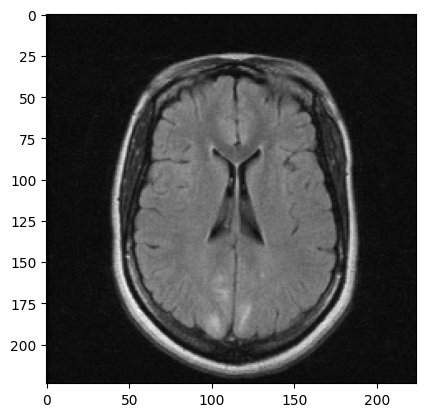

In [41]:
# Visualize the first image
plt.imshow(X[0], cmap='gray')

# ***Image Flattening***

In [42]:
# Flatten the images
X_flat = X.reshape(len(X), -1)

In [43]:
print("Original Image:")
print(X[0])
print("\nFlattened Image:")
print(X_flat[0])

Original Image:
[[ 3  9 16 ... 14 13 14]
 [ 3  7 13 ... 13 14 14]
 [ 3  6 13 ... 13 13  9]
 ...
 [ 3  7 12 ... 18 11 13]
 [ 3 10 14 ... 15 11 12]
 [ 3  9 14 ... 12 13 13]]

Flattened Image:
[ 3  9 16 ... 12 13 13]


# ***Train-Test Split***

In [44]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

In [45]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3030, 50176)
(3030,)
(758, 50176)
(758,)


# ***Data Normalization***

In [ ]:
# Check the maximum and minimum values of the original data
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0


In [ ]:
# Create a StandardScaler and fit-transform the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the same scaler to the testing data
X_test = scaler.transform(X_test)

In [ ]:
# Check the maximum and minimum values after Data Normalization
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

32.06582284157671 -2.6589511964738044
37.86159345551852 -2.5715969427722327


## **Machine Learning Algorithms**

# **Model Selection and Evaluation**

## **Model 1: Support Vector Machine Classifer (SVM)**

In [ ]:
# Create an SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

SVC()

In [ ]:
# Predictions on the training set
train_pred_svm = svm_classifier.predict(X_train)

# Predictions on the testing set
test_pred_svm = svm_classifier.predict(X_test)

## ***Model Evaluation for SVM***

### **Accuracy Score**

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_svm = accuracy_score(Y_train, train_pred_svm)
print("Training Accuracy:", train_accuracy_svm)

# Evaluate accuracy on the testing set
test_accuracy_svm = accuracy_score(Y_test, test_pred_svm)
print("Testing Accuracy:", test_accuracy_svm)

Training Accuracy: 0.9627062706270627
Testing Accuracy: 0.8812664907651715


### ***Classfication Report***

In [ ]:
print("\nSVM Classification Report:")
print(classification_report(Y_test, test_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       208
           1       0.84      0.82      0.83       184
           2       0.84      0.80      0.82       191
           3       0.92      0.96      0.94       175

    accuracy                           0.88       758
   macro avg       0.88      0.88      0.88       758
weighted avg       0.88      0.88      0.88       758



## ***Confusion Matrix***

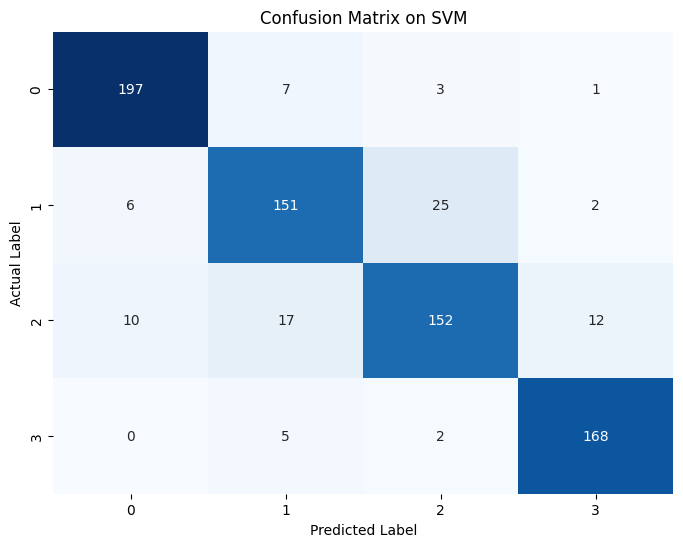

In [ ]:
# Calculate the confusion matrix
conf_mat_svm = confusion_matrix(Y_test, test_pred_svm)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on SVM')
plt.show()

## ***Model Predictions on SVM***

In [ ]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}

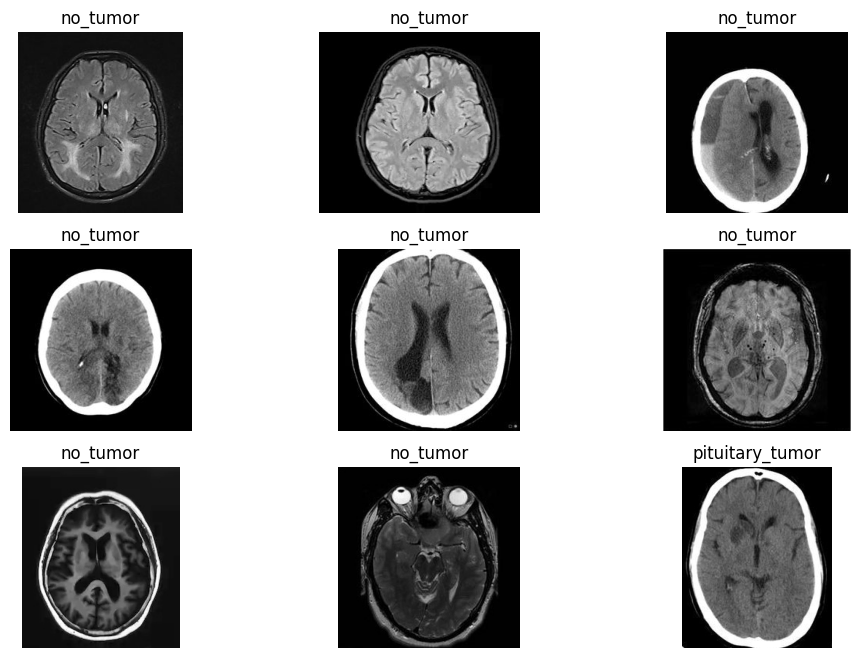

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

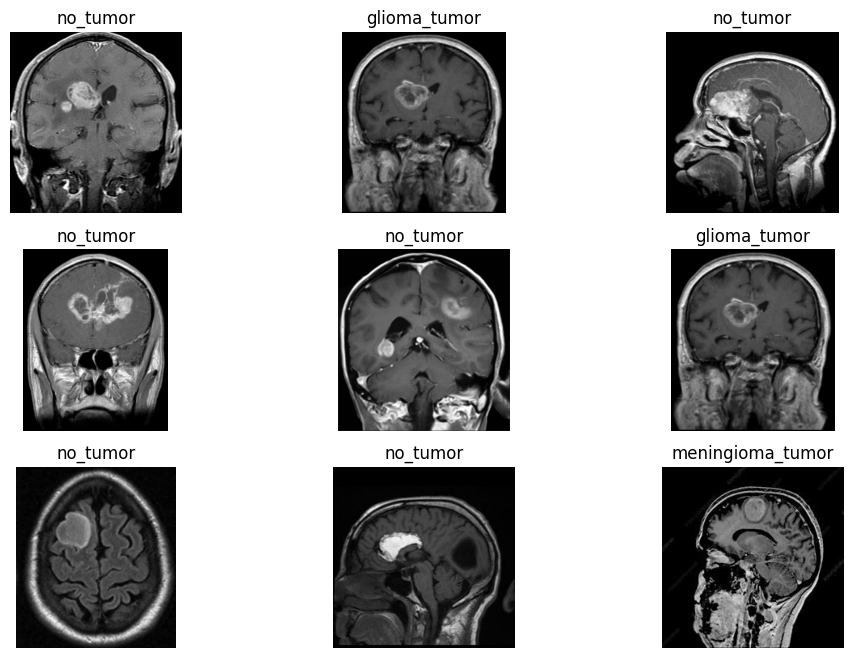

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

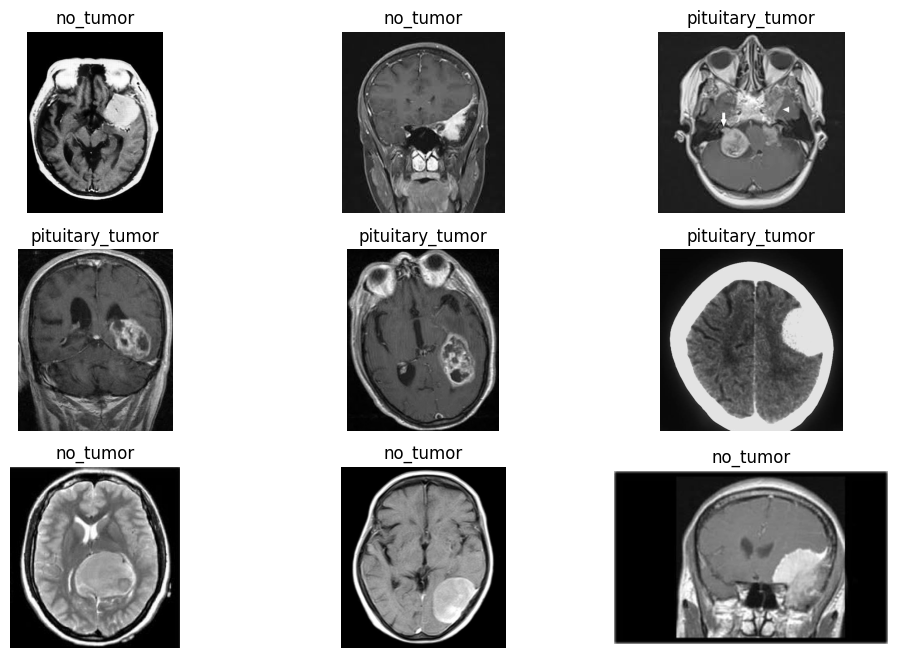

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

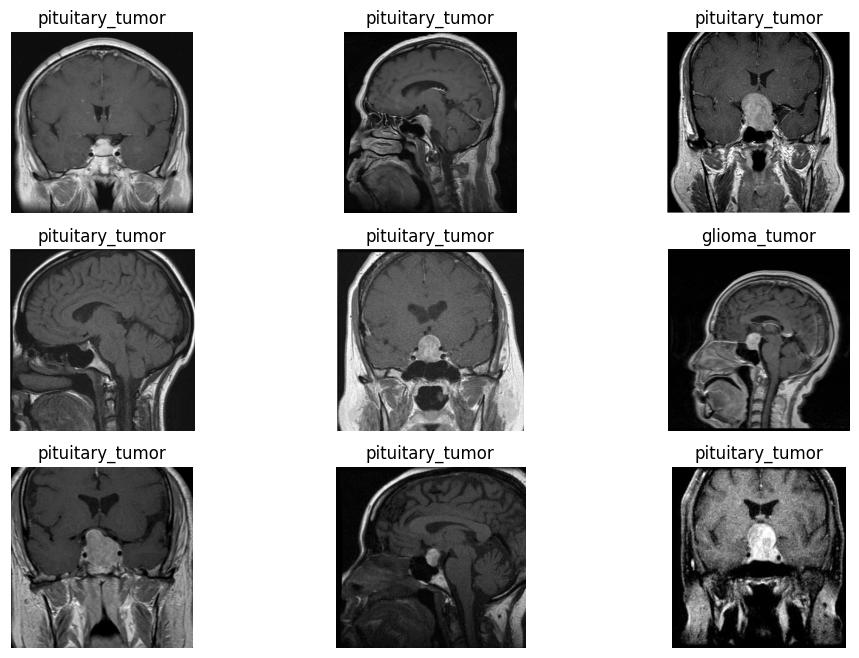

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

## ***Model 2: Gaussian Naive Bayes Classifier***

In [ ]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier on the training data
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Predictions on the training set
train_pred_nb = nb_classifier.predict(X_train)

# Predictions on the testing set
test_pred_nb = nb_classifier.predict(X_test)

## ***Model Evaluation for Naive Bayes***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_nb = accuracy_score(Y_train, train_pred_nb)
print("Training Accuracy:", train_accuracy_nb)

# Evaluate accuracy on the testing set
test_accuracy_nb = accuracy_score(Y_test, test_pred_nb)
print("Testing Accuracy:", test_accuracy_nb)

Training Accuracy: 0.5419141914191419
Testing Accuracy: 0.5303430079155673


### ***Classification Report***

In [ ]:
print("\nNaive Bayes Classification Report:")
print(classification_report(Y_test, test_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.56      0.63       208
           1       0.38      0.86      0.52       184
           2       0.42      0.07      0.12       191
           3       0.80      0.65      0.72       175

    accuracy                           0.53       758
   macro avg       0.58      0.54      0.50       758
weighted avg       0.58      0.53      0.49       758



## ***Confusion Matrix***

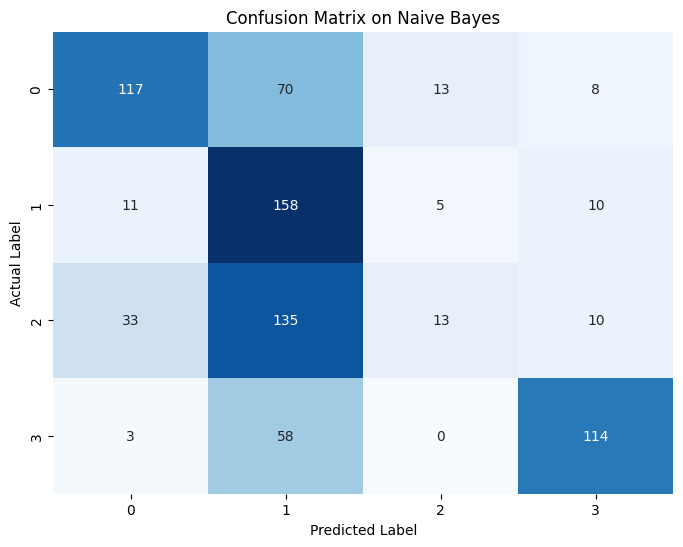

In [ ]:
# Calculate the confusion matrix
conf_mat_nb = confusion_matrix(Y_test, test_pred_nb)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Naive Bayes')
plt.show()

## ***Model 3: Decistion Tree Classifer***

In [46]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
# Make predictions on the training set
train_pred_dt = dt_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_dt = dt_classifier.predict(X_test)

## ***Model Evaluation on Decision Tree***

### ***Accuracy Score***

In [48]:
# Evaluate accuracy on the training set
train_accuracy_dt = accuracy_score(Y_train, train_pred_dt)
print("Training Accuracy:", train_accuracy_dt)

# Evaluate accuracy on the testing set
test_accuracy_dt = accuracy_score(Y_test, test_pred_dt)
print("Testing Accuracy:", test_accuracy_dt)

Training Accuracy: 1.0
Testing Accuracy: 0.8284960422163589


### ***Classification Report***

In [49]:
print("\nDecision Tree Classification Report:")
print(classification_report(Y_test, test_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       208
           1       0.81      0.78      0.79       184
           2       0.72      0.71      0.71       191
           3       0.85      0.88      0.86       175

    accuracy                           0.83       758
   macro avg       0.83      0.83      0.83       758
weighted avg       0.83      0.83      0.83       758



## ***Confusion Matrix***

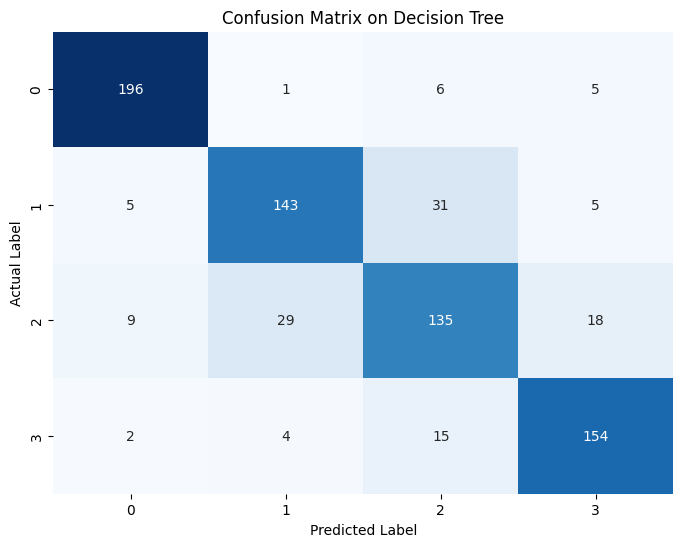

In [50]:
# Confusion Matrix
conf_mat_rf = confusion_matrix(Y_test, test_pred_dt)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Decision Tree')
plt.show()

## ***Model 4: Random Forest classifier***

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,
                                       random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the training set
train_pred_rf = rf_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_rf = rf_classifier.predict(X_test)

## ***Model Evaluation on Random Forest***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_rf = accuracy_score(Y_train, train_pred_rf)
print("Training Accuracy:", train_accuracy_rf)

# Evaluate accuracy on the testing set
test_accuracy_rf = accuracy_score(Y_test, test_pred_rf)
print("Testing Accuracy:", test_accuracy_rf)

Training Accuracy: 1.0
Testing Accuracy: 0.9234828496042217


### ***Classification Report***

In [ ]:
print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, test_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       208
           1       0.99      0.82      0.89       184
           2       0.85      0.90      0.87       191
           3       0.93      0.98      0.95       175

    accuracy                           0.92       758
   macro avg       0.93      0.92      0.92       758
weighted avg       0.93      0.92      0.92       758



## ***Confusion Matrix***

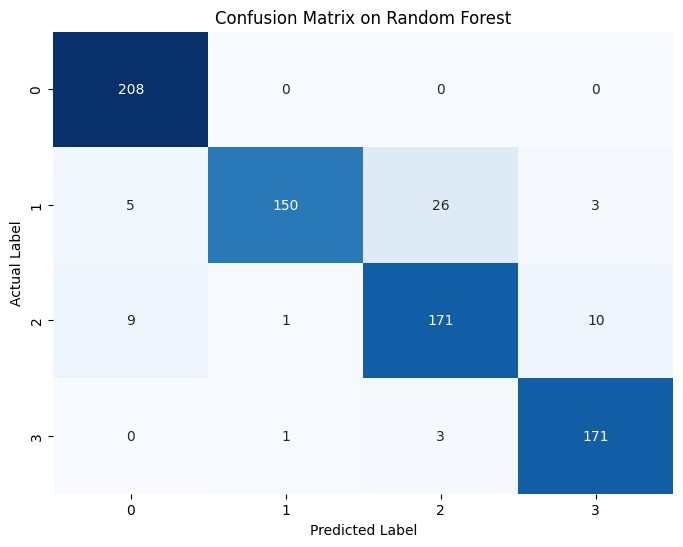

In [ ]:
# Confusion Matrix
conf_mat_rf = confusion_matrix(Y_test, test_pred_rf)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Random Forest')
plt.show()

## ***Model 5: k-Nearest Neighbors (KNN) Classifier***

In [ ]:
# Create a KNN classifier (you can choose the value of k)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the training set
train_pred_knn = knn_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_knn = knn_classifier.predict(X_test)

## ***Model Evaluation on KNN***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_knn = accuracy_score(Y_train, train_pred_knn)
print("Training Accuracy:", train_accuracy_knn)

# Evaluate accuracy on the testing set
test_accuracy_knn = accuracy_score(Y_test, test_pred_knn)
print("Testing Accuracy:", test_accuracy_knn)

Training Accuracy: 0.9452145214521452
Testing Accuracy: 0.837730870712401


### ***Classification Report***

In [ ]:
print("\nKNN Classification Report:")
print(classification_report(Y_test, test_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       208
           1       0.81      0.84      0.83       184
           2       0.88      0.62      0.73       191
           3       0.91      0.99      0.95       175

    accuracy                           0.84       758
   macro avg       0.85      0.84      0.84       758
weighted avg       0.84      0.84      0.83       758



## ***Confusion Matrix***

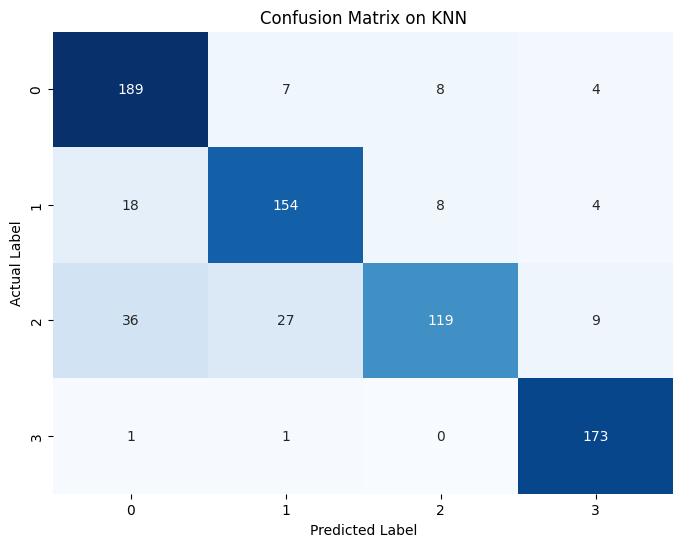

In [ ]:
# Calculate the confusion matrix
conf_mat_knn = confusion_matrix(Y_test, test_pred_knn)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on KNN')
plt.show()

## ***Model 6: Logistic Regression***

In [ ]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the training set
train_pred_lr = logreg_model.predict(X_train)

# Make predictions on the testing set
test_pred_lr = logreg_model.predict(X_test)

## ***Model Evaluation on Logistic Regression***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_lr = accuracy_score(Y_train, train_pred_lr)
print("Training Accuracy:", train_accuracy_lr)

# Evaluate accuracy on the testing set
test_accuracy_lr = accuracy_score(Y_test, test_pred_lr)
print("Testing Accuracy:", test_accuracy_lr)

Training Accuracy: 1.0
Testing Accuracy: 0.8786279683377308


### ***Classification Report***

In [ ]:
print("\nLogistic Regression Classification Report:")
print(classification_report(Y_test, test_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       208
           1       0.83      0.80      0.81       184
           2       0.82      0.81      0.81       191
           3       0.91      0.99      0.95       175

    accuracy                           0.88       758
   macro avg       0.88      0.88      0.88       758
weighted avg       0.88      0.88      0.88       758



## ***Confusion Matrix***

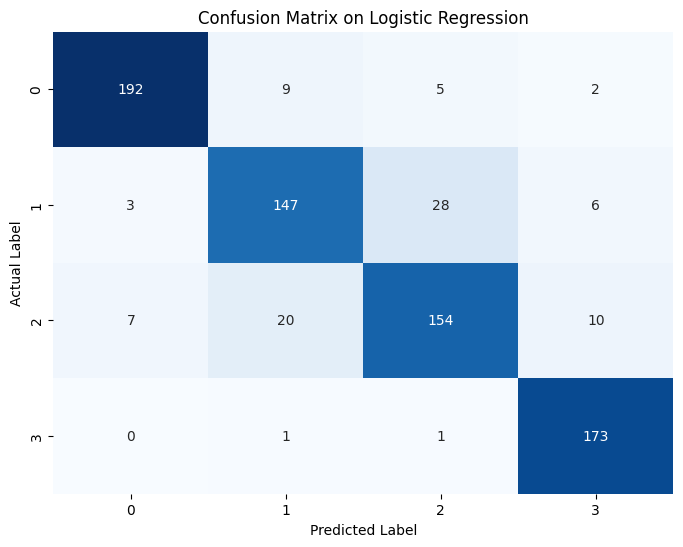

In [ ]:
# Calculate the Confusion Matrix
conf_mat_lr = confusion_matrix(Y_test, test_pred_lr)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Logistic Regression')
plt.show()

## ***Model 7: XGBoost Classifer***

In [ ]:
# Create an XGBoost classifier
#xgb_classifier = XGBClassifier()
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=3, nthread=-1)

# Train the model on the training data
xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [ ]:
# Make predictions on the training set
train_pred_xgb = xgb_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_xgb = xgb_classifier.predict(X_test)

## ***Model Evaluation on XGBoost***

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_xgb = accuracy_score(Y_train, train_pred_xgb)
print("Training Accuracy:", train_accuracy_xgb)

# Evaluate accuracy on the testing set
test_accuracy_xgb = accuracy_score(Y_test, test_pred_xgb)
print("Testing Accuracy:", test_accuracy_xgb)

Training Accuracy: 1.0
Testing Accuracy: 0.924802110817942


### ***Classification Report***

In [ ]:
print("\nXGBoost Classification Report:")
print(classification_report(Y_test, test_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       208
           1       0.96      0.84      0.90       184
           2       0.87      0.91      0.89       191
           3       0.92      0.99      0.95       175

    accuracy                           0.92       758
   macro avg       0.93      0.92      0.92       758
weighted avg       0.93      0.92      0.92       758



## ***Confusion Matrix***

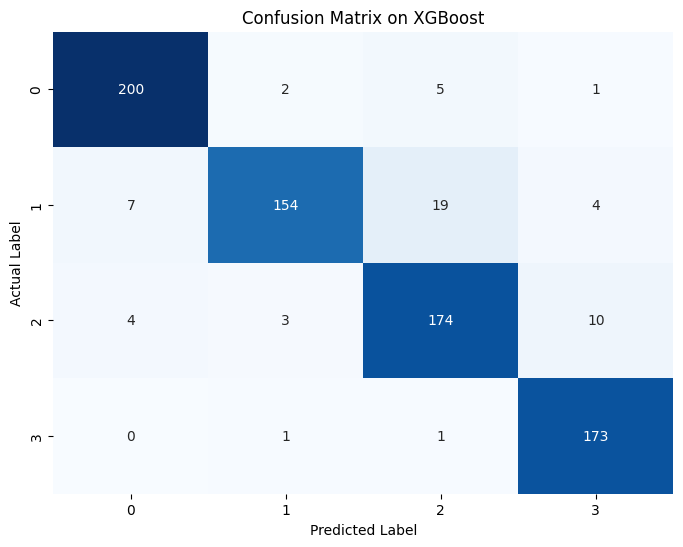

In [ ]:
# Confusion Matrix
conf_mat_xgb = confusion_matrix(Y_test, test_pred_xgb)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on XGBoost')
plt.show()

## ***Model Predictions on XGBoost***

In [ ]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}

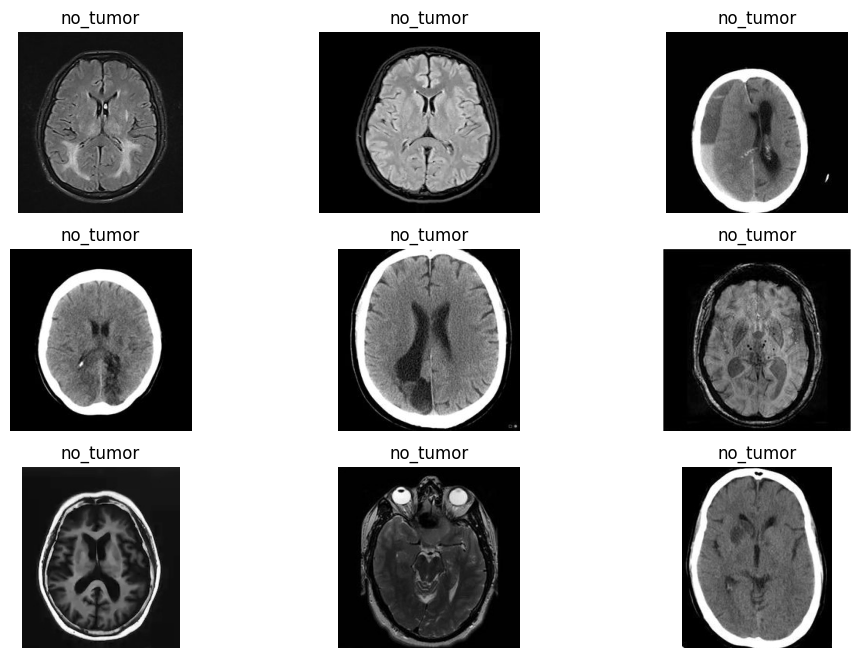

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

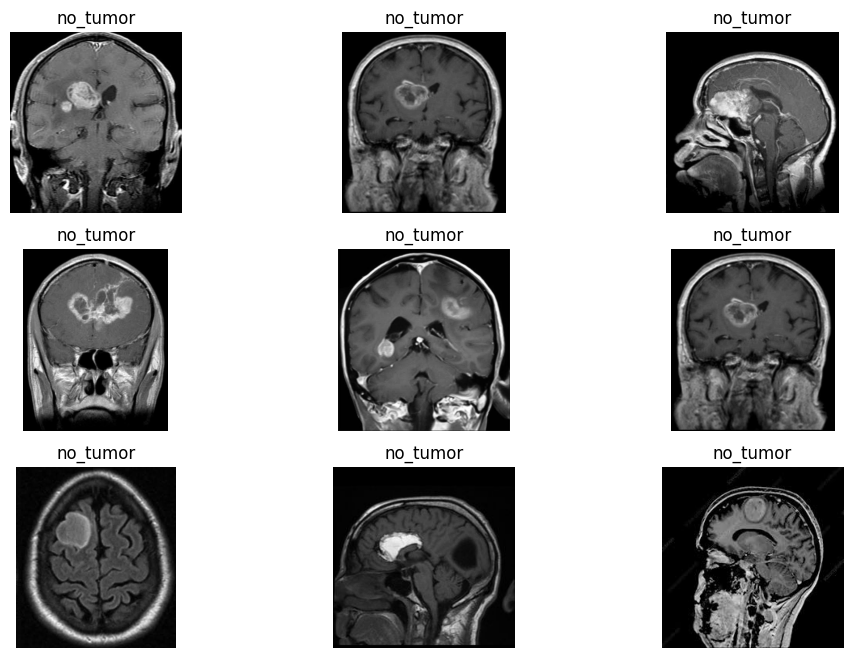

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

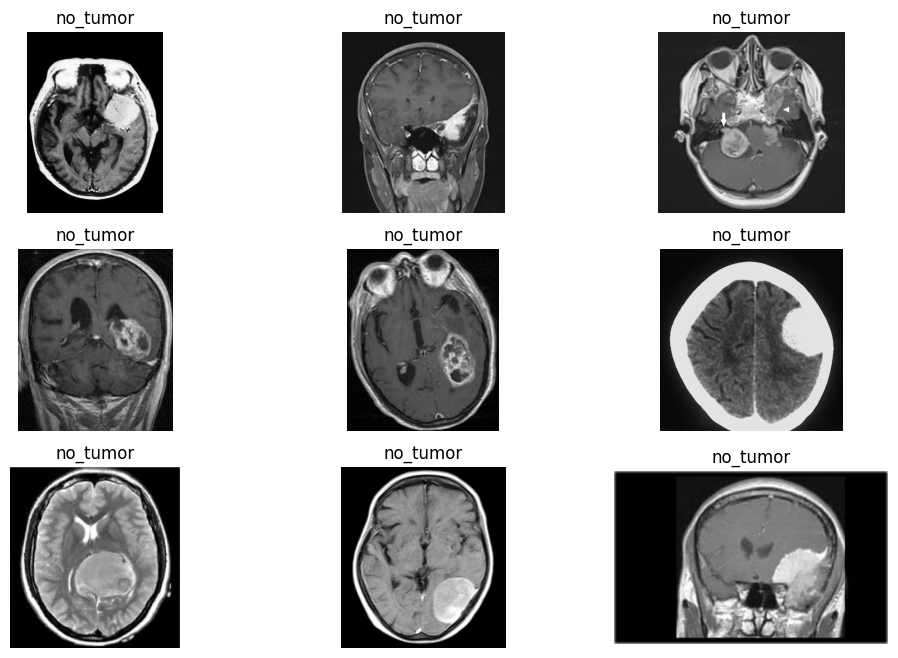

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

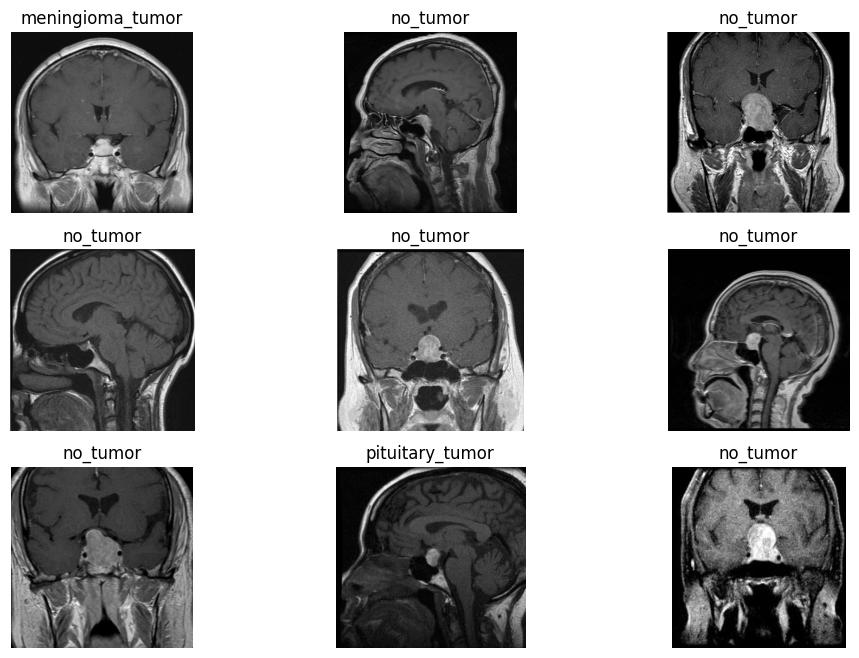

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

## ***Model 8: MLP CLassifier***

In [ ]:
# Initialize MLPClassifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=100,  # Set a fixed number of epochs
    random_state=42,
)

Epoch 1/100, Training Accuracy: 0.7785, Test Accuracy: 0.7058
Epoch 2/100, Training Accuracy: 0.8855, Test Accuracy: 0.8232
Epoch 3/100, Training Accuracy: 0.9125, Test Accuracy: 0.8074
Epoch 4/100, Training Accuracy: 0.9604, Test Accuracy: 0.8417
Epoch 5/100, Training Accuracy: 0.9719, Test Accuracy: 0.8430
Epoch 6/100, Training Accuracy: 0.9637, Test Accuracy: 0.8496
Epoch 7/100, Training Accuracy: 0.9772, Test Accuracy: 0.8496
Epoch 8/100, Training Accuracy: 0.9749, Test Accuracy: 0.8496
Epoch 9/100, Training Accuracy: 0.9901, Test Accuracy: 0.8813
Epoch 10/100, Training Accuracy: 0.9769, Test Accuracy: 0.8562
Epoch 11/100, Training Accuracy: 0.9776, Test Accuracy: 0.8668
Epoch 12/100, Training Accuracy: 0.9812, Test Accuracy: 0.8615
Epoch 13/100, Training Accuracy: 0.9884, Test Accuracy: 0.8720
Epoch 14/100, Training Accuracy: 0.9743, Test Accuracy: 0.8575
Epoch 15/100, Training Accuracy: 0.9637, Test Accuracy: 0.8522
Epoch 16/100, Training Accuracy: 0.9485, Test Accuracy: 0.8641
E

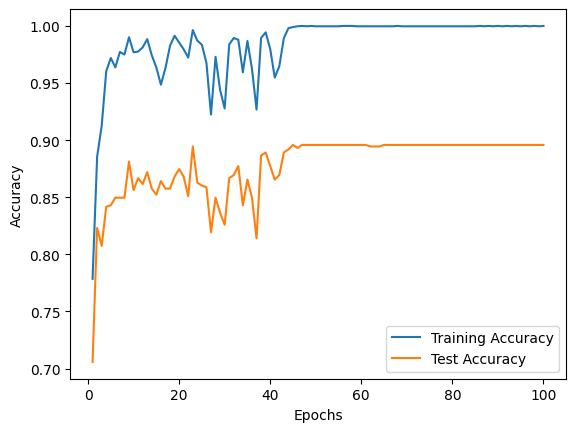

In [ ]:
# Training loop without early stopping
train_accuracy_list = []
test_accuracy_list = []

# Define the number of training epochs
epochs = 100

for epoch in range(epochs):
    # Train the model on the training data
    mlp_classifier.partial_fit(X_train, Y_train, classes=np.unique(Y_train))

    # Predictions on the training set
    train_pred_mlp = mlp_classifier.predict(X_train)

    # Predictions on the validation set
    test_pred_mlp = mlp_classifier.predict(X_test)

    # Compute training accuracy and add to the list
    train_accuracy = accuracy_score(Y_train, train_pred_mlp)
    train_accuracy_list.append(train_accuracy)

    # Compute validation accuracy and add to the list
    test_accuracy = accuracy_score(Y_test, test_pred_mlp)
    test_accuracy_list.append(test_accuracy)

    # Print progress
    print(f'Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy over epochs
plt.plot(range(1, epochs + 1), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## ***Model Evaluation on MLP CLassifier***

In [ ]:
# Make predictions on the training set
train_pred_mlp = mlp_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_mlp = mlp_classifier.predict(X_test)

### ***Accuracy Score***

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_mlp = accuracy_score(Y_train, train_pred_mlp)
print("Training Accuracy:", train_accuracy_mlp)

# Evaluate accuracy on the testing set
test_accuracy_mlp = accuracy_score(Y_test, test_pred_mlp)
print("Testing Accuracy:", test_accuracy_mlp)

Training Accuracy: 1.0
Testing Accuracy: 0.895778364116095


### ***Classification Report***

In [ ]:
print("\nMLP Classification Report:")
print(classification_report(Y_test, test_pred_mlp))


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       208
           1       0.86      0.80      0.83       184
           2       0.84      0.85      0.85       191
           3       0.94      0.98      0.96       175

    accuracy                           0.90       758
   macro avg       0.89      0.90      0.89       758
weighted avg       0.89      0.90      0.89       758



## ***Confusion Matrix***

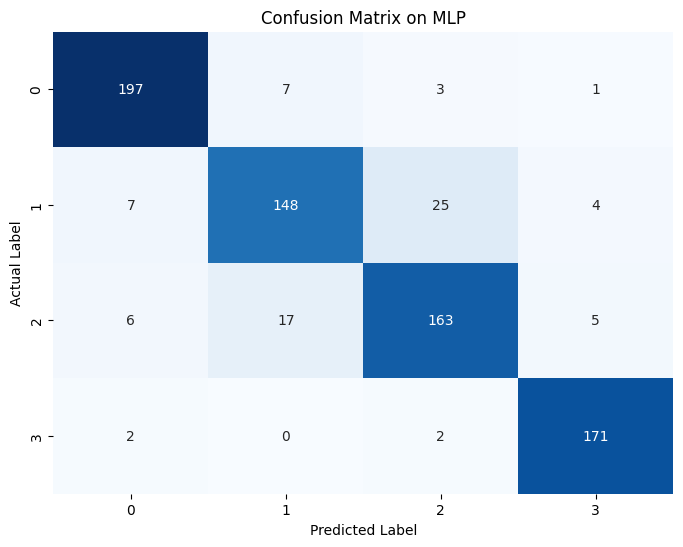

In [ ]:
# Confusion Matrix
conf_mat_mlp = confusion_matrix(Y_test, test_pred_mlp)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on MLP')
plt.show()

## ***Model Predictions on MLP***

In [ ]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}

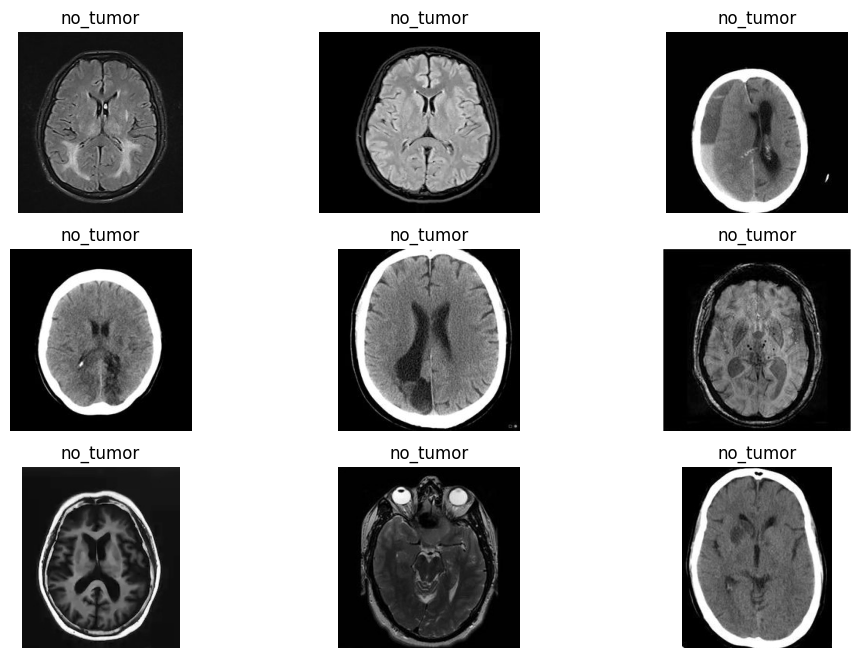

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

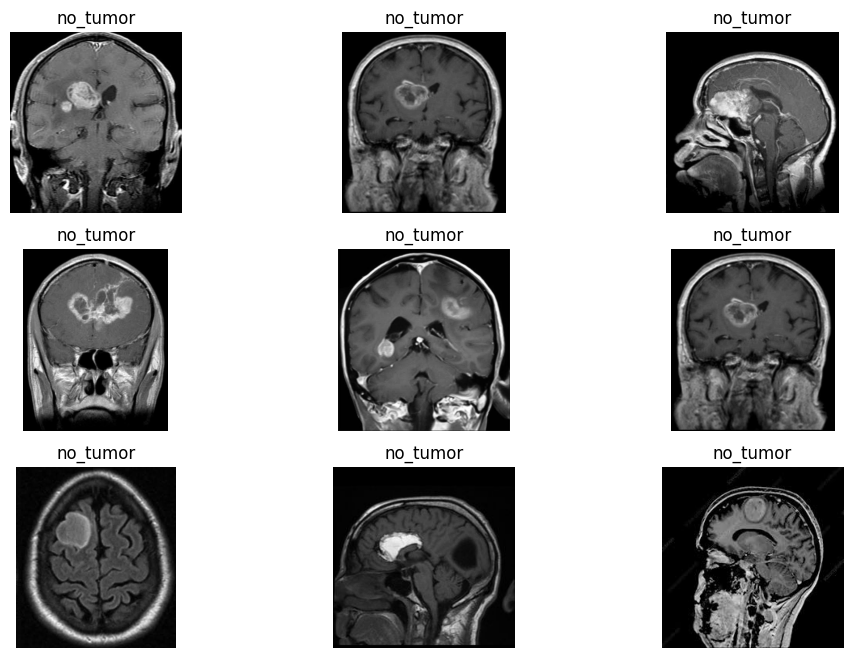

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

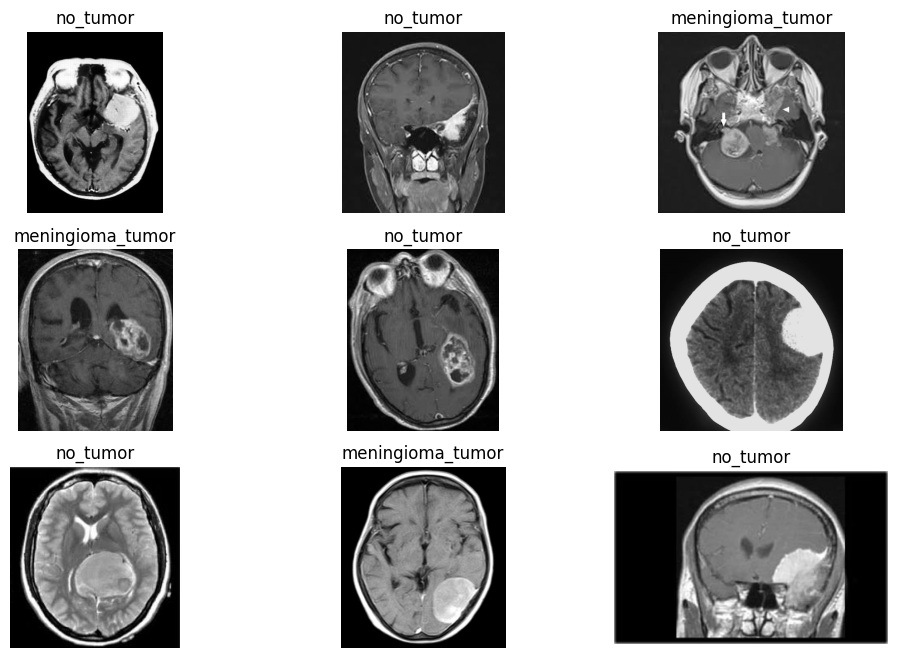

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

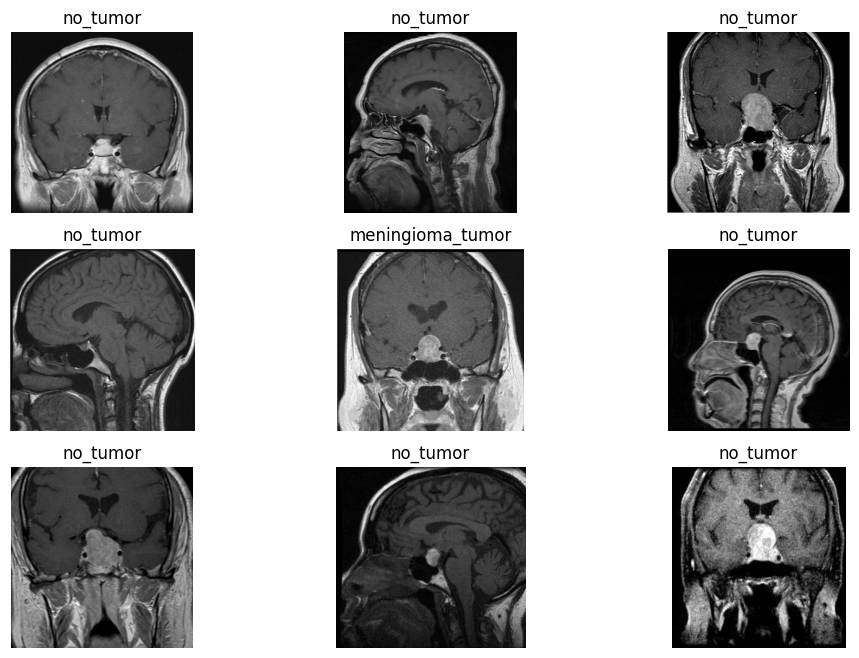

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

# **Deep Learning Algorithm | CNN**

## ***Data Preprocessing***

### ***Train-Test Split***

In [14]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

### ***Data Augmentation***

In [15]:
# Add channel dimension for grayscale images
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

# Create ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create data generators
train_data_generator = datagen.flow(x_train, y_train, batch_size=32)
val_data_generator = datagen.flow(x_val, y_val, batch_size=32)

In [16]:
# Get the number of augmented images in the training set
num_train_images = len(train_data_generator)

# Get the number of augmented images in the validation set
num_val_images = len(val_data_generator)

print(f"Number of augmented images in the training set: {num_train_images}")
print(f"Number of augmented images in the validation set: {num_val_images}")

Number of augmented images in the training set: 95
Number of augmented images in the validation set: 24


## ***CNN Model***

In [17]:
# Feature extraction and CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [18]:
history = model.fit(train_data_generator, epochs=100, validation_data=val_data_generator)

Epoch 1/100
95/95 [==============================] - 26s 200ms/step - loss: 1.2398 - accuracy: 0.4644 - val_loss: 0.9829 - val_accuracy: 0.6227
Epoch 2/100
95/95 [==============================] - 27s 285ms/step - loss: 0.8534 - accuracy: 0.6667 - val_loss: 0.7950 - val_accuracy: 0.6807
Epoch 3/100
95/95 [==============================] - 34s 355ms/step - loss: 0.7146 - accuracy: 0.7109 - val_loss: 0.7406 - val_accuracy: 0.6715
Epoch 4/100
95/95 [==============================] - 27s 288ms/step - loss: 0.6435 - accuracy: 0.7512 - val_loss: 0.6457 - val_accuracy: 0.7507
Epoch 5/100
95/95 [==============================] - 16s 169ms/step - loss: 0.5712 - accuracy: 0.7812 - val_loss: 0.5965 - val_accuracy: 0.7546
Epoch 6/100
95/95 [==============================] - 16s 172ms/step - loss: 0.5097 - accuracy: 0.8043 - val_loss: 0.5545 - val_accuracy: 0.7876
Epoch 7/100
95/95 [==============================] - 16s 171ms/step - loss: 0.4662 - accuracy: 0.8274 - val_loss: 0.5504 - val_accuracy:

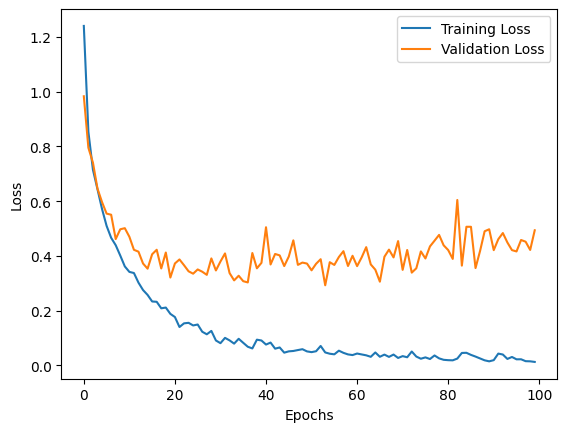

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

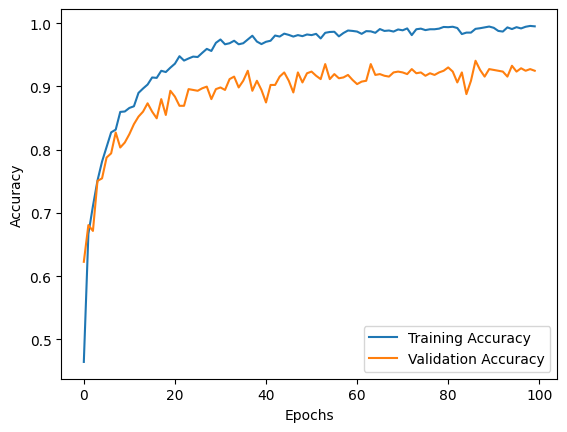

In [20]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
loss,acc = model.evaluate(train_data_generator)
print("Accuracy on Train Data:",acc)

loss,acc = model.evaluate(val_data_generator)
print("Accuracy on Test Data:",acc)

95/95 [==============================] - 12s 125ms/step - loss: 0.0173 - accuracy: 0.9941
Accuracy on Train Data: 0.9940593838691711
24/24 [==============================] - 3s 113ms/step - loss: 0.5106 - accuracy: 0.9301
Accuracy on Test Data: 0.9300791621208191


In [22]:
from tensorflow.keras.models import save_model

# Save the entire model to a file in the TensorFlow SavedModel format
save_model(model, "my_cnn_model")

## ***Model Predictions on CNN***

In [23]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}

1/1 [==============================] - 0s 16ms/step


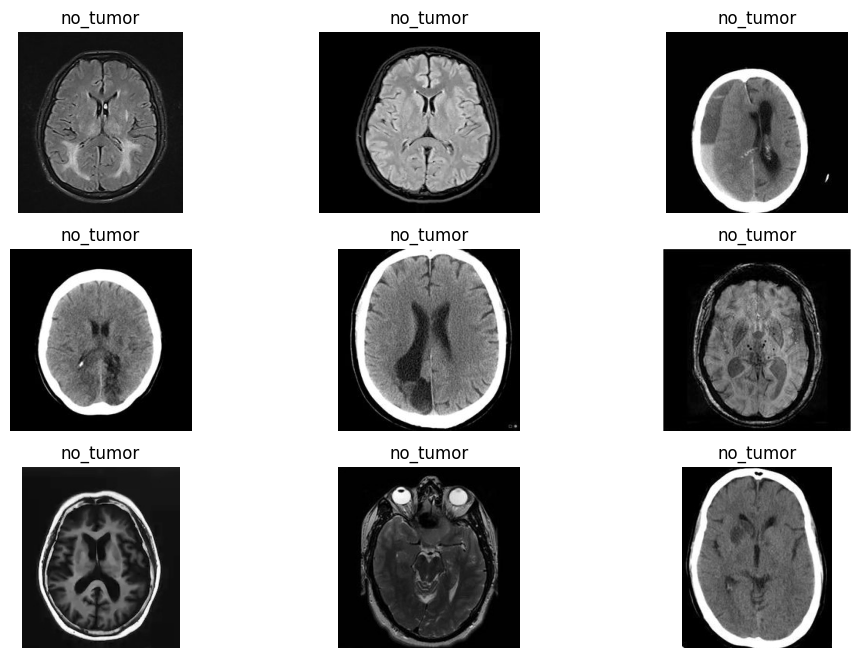

In [24]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

1/1 [==============================] - 0s 23ms/step


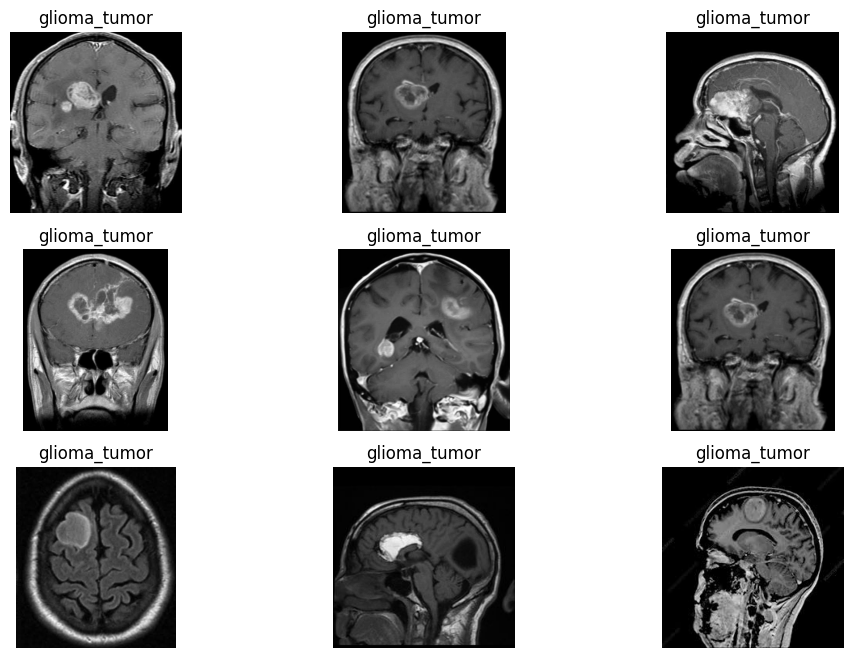

In [25]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

1/1 [==============================] - 0s 27ms/step


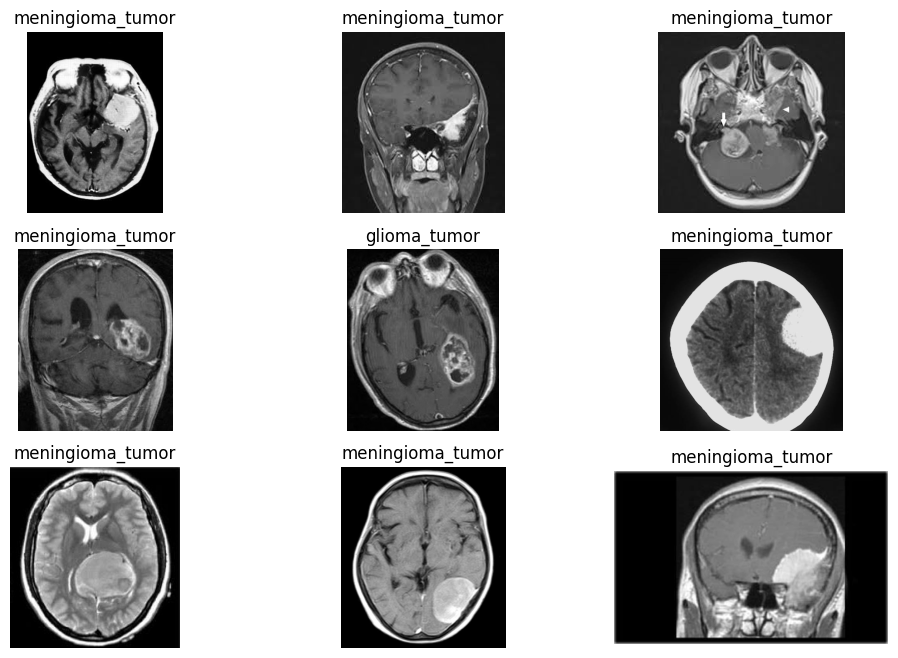

In [27]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

1/1 [==============================] - 0s 17ms/step


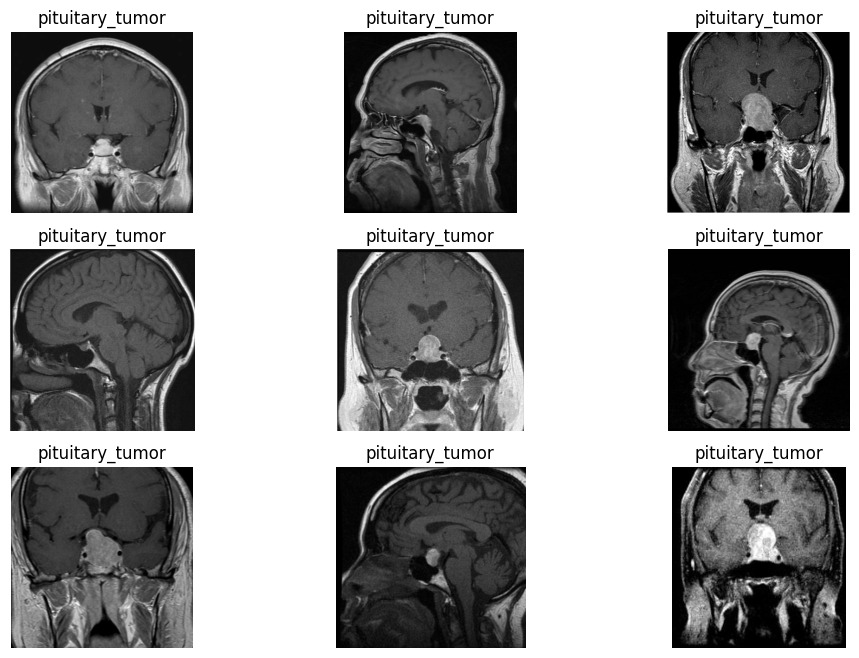

In [28]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/My Drive/Brain_Tumor_Dataset/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()